# Final model evaluation

In this notebook, I compare the final models on the holdout test set.

## Contents in this notebook:
1. [Notebook setup](#setup)
2. [Final model evaluation](#eval)

## 1. Notebook setup <a name="setup"></a>

In [1]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}\n')

# Import packages.
import routing
import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill
import pickle
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
print(tf.__version__)

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks - GitHub
Project folder: C:\Users\muell\thesis_main\thesis_code

2.7.1


In [2]:
# Load test dataset

X_test = pd.read_pickle('data/generated_final_pickle/df_features_test.pickle')
y_test = X_test.pop('distance')
print(X_test.shape, y_test.shape)

(20000, 43) (20000,)


In [3]:
# prepare comparison of results

test_results = {}

def compute_result(y_test, y_pred, prediction_time):
    return [
        round(np.sqrt(mean_squared_error(y_test, y_pred)), 2), 
        str(round(100 * mean_absolute_percentage_error(y_test, y_pred), 2))+'%', 
        str(round(1000 * prediction_time / y_pred.shape[0], 4))+'s'
    ]

## 2. Final model evaluation <a name="eval"></a>

### Baselines

{'Constant model': [5626.97, '78.42%', '0.0s']} 

Model performance
--------------------------------------
MSE: 31662789.21
RMSE: 5626.97
MAE: 3692.77
MAPE: 78.42%
R2: -0.0




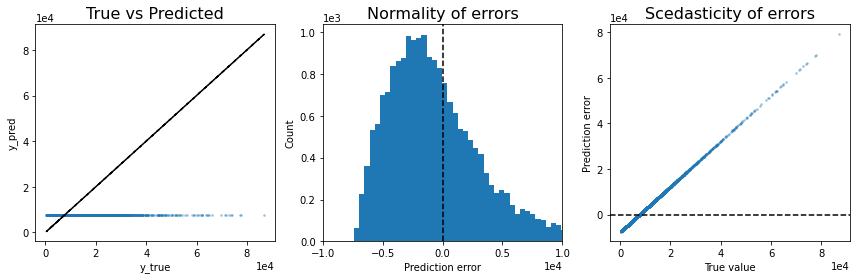

In [4]:
# Constant model

# load model
with open('models/baseline_constant.dill', 'rb') as file:
    average_baseline = dill.load(file)

# make predictions
t0 = time.time()
y_pred = average_baseline(X_test)
t1 = time.time()

# compute results
test_results['Constant model'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s']} 

Model performance
--------------------------------------
MSE: 20237136.17
RMSE: 4498.57
MAE: 2340.17
MAPE: 28.49%
R2: 0.36




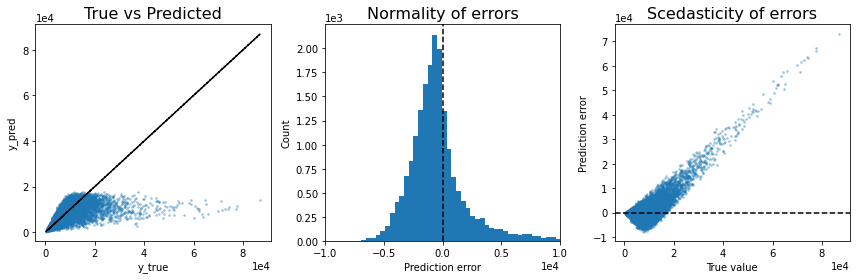

In [5]:
# Beardwood

# load model
with open('models/baseline_beardwood.pkl', 'rb') as f:
    beardwood = pickle.load(f)

# compute features
X_test_beardwood = np.sqrt(X_test['NumCust']) * np.array(X_test['AreaRoot'])
X_test_beardwood = np.array(X_test_beardwood).reshape(-1, 1)    

# make predictions
t0 = time.time()
y_pred = beardwood.predict(X_test_beardwood)
t1 = time.time()

# compute results
test_results['Beardwood (1959) - TSP'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s']} 

Model performance
--------------------------------------
MSE: 4225266.98
RMSE: 2055.55
MAE: 1293.44
MAPE: 16.93%
R2: 0.87




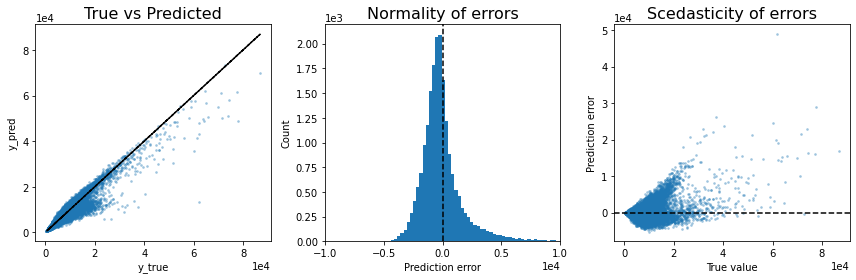

In [6]:
# Daganzo

# load model
with open('models/baseline_daganzo.pkl', 'rb') as f:
    daganzo = pickle.load(f)

# compute features
X_test_daganzo = {}
X_test_daganzo['var1'] = X_test['DepCustAvg'] * X_test['AreaRoot'] * X_test['NumCust'] / (X_test['CapRatio'] * X_test['NumCust'])
X_test_daganzo['var2'] = np.sqrt(X_test['NumCust']) * X_test['AreaRoot']
X_test_daganzo = pd.DataFrame(X_test_daganzo)    
    
# make predictions    
t0 = time.time()
y_pred = daganzo.predict(X_test_daganzo)
t1 = time.time()

# compute results
test_results['Daganzo (1984) - CVRP'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s']} 

Model performance
--------------------------------------
MSE: 1244691.4
RMSE: 1115.66
MAE: 767.48
MAPE: 10.11%
R2: 0.96




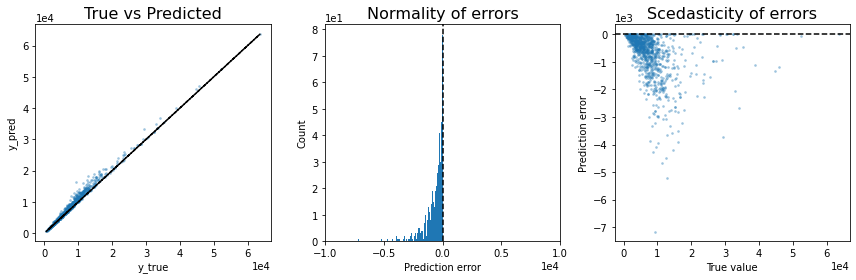

In [7]:
# Greedy heuristic

# # load model
# with open('models/baseline_heuristic.dill', 'rb') as file:
#     greedy_heuristic = dill.load(file)

# # load instance test data
# X_test_instances = pd.read_pickle('data/generated_final_pickle/df_instances_test.pickle')
# y_test_instances = X_test.pop('solution_distance')
# X_test_instances = X_test.iloc[:1000,:]
# y_test_instances = y_test.iloc[:1000]
# print(X_test_instances.shape, y_test_instances.shape)

# # make predictions
# t0 = time.time()
# y_pred = greedy_heuristic(X_test_instances)
# t1 = time.time()

# load already computed results so that this notebook runs quickly
with open('models/baseline_heuristic_result.pkl', 'rb') as f:
    y_test_instances, y_pred, prediction_time = pickle.load(f)

# compute results
test_results['Greedy heuristic'] = compute_result(y_test_instances, y_pred, prediction_time)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test_instances, y_pred)
models.plot_performance(y_test_instances, y_pred)

### Linear regression models

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s']} 

Model performance
--------------------------------------
MSE: 5872731.79
RMSE: 2423.37
MAE: 1339.95
MAPE: 25.66%
R2: 0.81




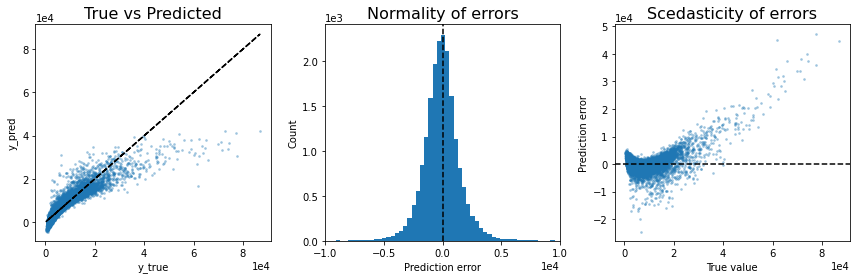

In [8]:
# Multiple linear regression

# load model
with open('models/linear_multiple.pkl', 'rb') as f:
    linreg = dill.load(f)

# make predictions
t0 = time.time()
y_pred = linreg.predict(X_test)
t1 = time.time()

# compute results
test_results['Multiple Linear Regression'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.0002s']} 

Model performance
--------------------------------------
MSE: 3928612.12
RMSE: 1982.07
MAE: 986.49
MAPE: 13.54%
R2: 0.88




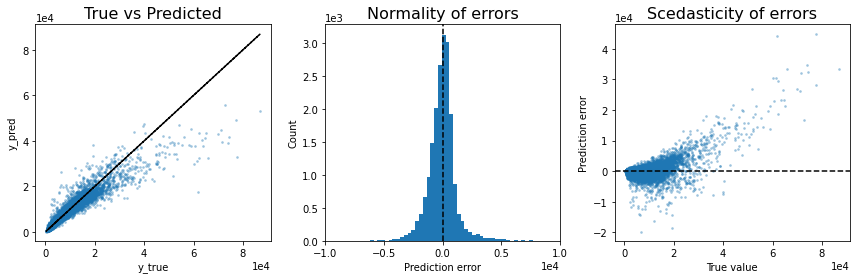

In [9]:
# Multiple linear regression root transform

# load model
with open('models/linear_multiple_root.pkl', 'rb') as f:
    linreg = dill.load(f)

# make predictions
t0 = time.time()
y_pred = linreg.predict(X_test)
t1 = time.time()

# compute results
test_results['Multiple Regression (root-transform)'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.0002s'], 'Polynomial regression': [859.23, '5.56%', '0.021s']} 

Model performance
--------------------------------------
MSE: 738268.33
RMSE: 859.23
MAE: 419.41
MAPE: 5.56%
R2: 0.98




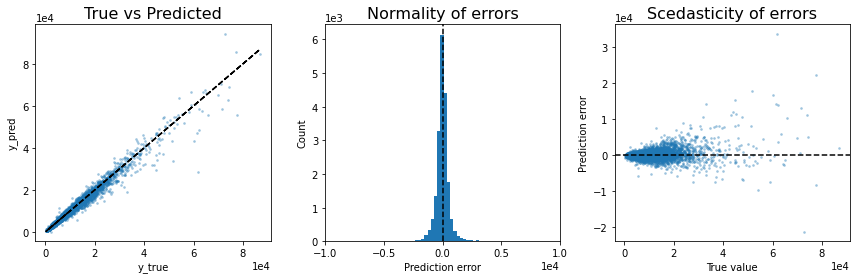

In [12]:
# Polynomial linear regression

# load model
with open('models/linear_polynomial.pkl', 'rb') as f:
    linreg = dill.load(f)

# make predictions
t0 = time.time()
y_pred = linreg.predict(X_test)
t1 = time.time()

# compute results
test_results['Polynomial regression'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

### Neural network

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.0002s'], 'Polynomial regression': [859.23, '5.56%', '0.021s'], 'Multilayer-perceptron': [636.7, '4.48%', '0.0559s']} 

Model performance
--------------------------------------
MSE: 405391.67
RMSE: 636.7
MAE: 316.83
MAPE: 4.48%
R2: 0.99




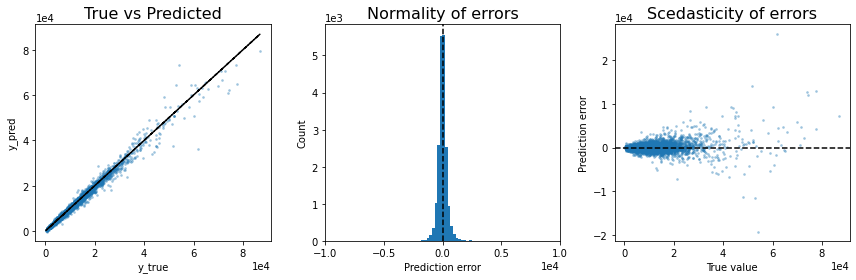

In [13]:
# Multilayer-perceptron

# load model
mlp = tf.keras.models.load_model('models/dnn_model_final')
#mlp.summary

# make predictions
t0 = time.time()
y_pred = mlp.predict(X_test).flatten()
t1 = time.time()

# compute results
test_results['Multilayer-perceptron'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

### Tree ensembles

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.0002s'], 'Polynomial regression': [859.23, '5.56%', '0.021s'], 'Multilayer-perceptron': [636.7, '4.48%', '0.0559s'], 'Decision tree': [1616.31, '12.14%', '0.001s']} 

Model performance
--------------------------------------
MSE: 2612457.89
RMSE: 1616.31
MAE: 933.85
MAPE: 12.14%
R2: 0.92




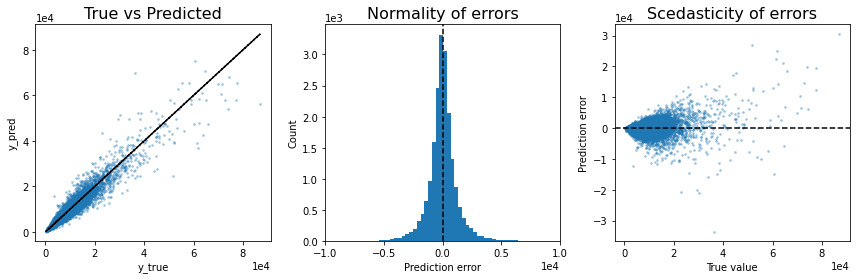

In [14]:
# Decision tree

# load model
with open('models/decision_tree.pkl', 'rb') as f:
    tree = dill.load(f)

# make predictions
t0 = time.time()
y_pred = tree.predict(X_test)
t1 = time.time()

# compute results
test_results['Decision tree'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.2s finished


{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.0002s'], 'Polynomial regression': [859.23, '5.56%', '0.021s'], 'Multilayer-perceptron': [636.7, '4.48%', '0.0559s'], 'Decision tree': [1616.31, '12.14%', '0.001s'], 'Random forest': [1045.04, '6.83%', '0.0154s']} 

Model performance
--------------------------------------
MSE: 1092102.22
RMSE: 1045.04
MAE: 526.78
MAPE: 6.83%
R2: 0.97




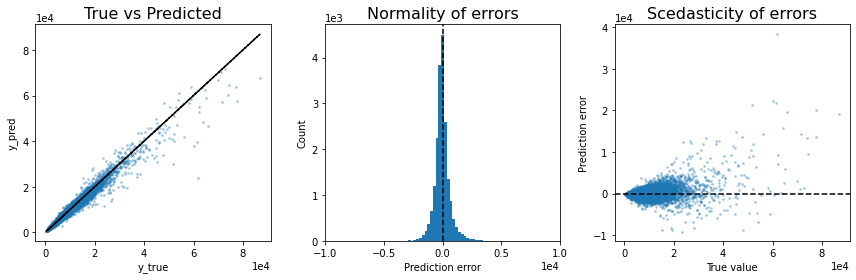

In [15]:
# Random forest

# load model
with open('models/ensemble_rf.pkl', 'rb') as f:
    random_forest = dill.load(f)

# make predictions
t0 = time.time()
y_pred = random_forest.predict(X_test)
t1 = time.time()

# compute results
test_results['Random forest'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0s'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0001s'], 'Daganzo (1984) - CVRP': [2055.55, '16.93%', '0.0001s'], 'Greedy heuristic': [1115.66, '10.11%', '734.1373s'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.0006s'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.0002s'], 'Polynomial regression': [859.23, '5.56%', '0.021s'], 'Multilayer-perceptron': [636.7, '4.48%', '0.0559s'], 'Decision tree': [1616.31, '12.14%', '0.001s'], 'Random forest': [1045.04, '6.83%', '0.0154s'], 'Extreme gradient boosting': [695.94, '4.8%', '0.0072s']} 

Model performance
--------------------------------------
MSE: 484329.8
RMSE: 695.94
MAE: 362.14
MAPE: 4.8%
R2: 0.98




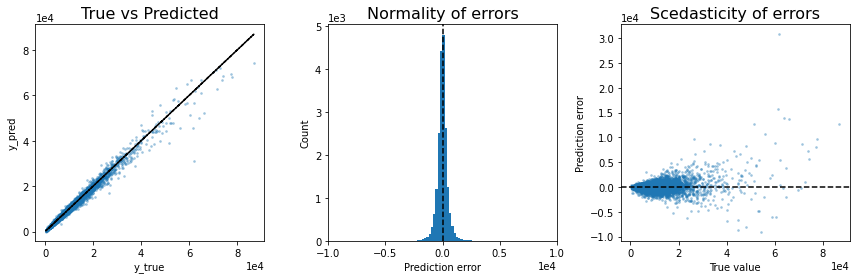

In [16]:
# Extreme gradient boosting

# load model
with open('models/ensemble_xg_boosting.pkl', 'rb') as f:
    xgbr = dill.load(f)

# make predictions
t0 = time.time()
y_pred = xgbr.predict(X_test)
t1 = time.time()

# compute results
test_results['Extreme gradient boosting'] = compute_result(y_test, y_pred, t1-t0)
print(test_results,'\n')

# Model evaluation
models.evaluate(y_test, y_pred)
models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0μs'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0μs'], 'Daganzo (1984) - CVRP': [2725.82, '28.84%', '0.2μs'], 'Greedy heuristic': [1115.66, '10.11%', '734137.34μs'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.65μs'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.35μs'], 'Polynomial regression': [859.23, '5.56%', '15.99μs'], 'Multilayer-perceptron': [638.05, '4.83%', '58.25μs'], 'Decision tree': [1616.31, '12.14%', '0.95μs'], 'Random forest': [1039.92, '6.82%', '17.61μs'], 'Gradient boosting': [716.55, '5.43%', '18.05μs'], 'Extreme gradient boosting': [695.94, '4.8%', '8.35μs'], 'LinearSVR': [2147.09, '12.98%', '0.65μs']} 

Model performance
--------------------------------------
MSE: 4609976.48
RMSE: 2147.09
MAE: 988.05
MAPE: 12.98%
R2: 0.85




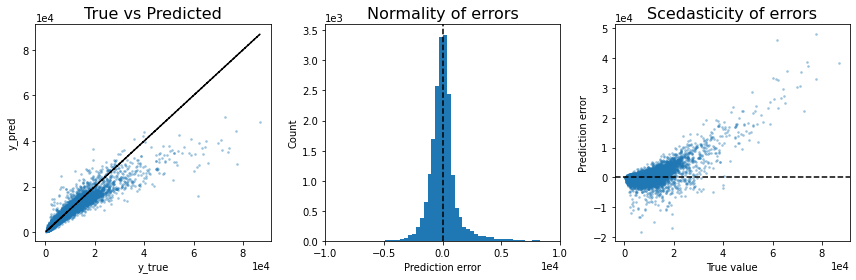

In [17]:
# # SVR

# # load model
# with open('models/various_svr.pkl', 'rb') as f:
#     svr = dill.load(f)

# # make predictions
# t0 = time.time()
# y_pred = svr.predict(X_test)
# t1 = time.time()

# # compute results
# test_results['LinearSVR'] = compute_result(y_test, y_pred, t1-t0)
# print(test_results,'\n')

# # Model evaluation
# models.evaluate(y_test, y_pred)
# models.plot_performance(y_test, y_pred)

{'Constant model': [5626.97, '78.42%', '0.0μs'], 'Beardwood (1959) - TSP': [4498.57, '28.49%', '0.0μs'], 'Daganzo (1984) - CVRP': [2725.82, '28.84%', '0.2μs'], 'Greedy heuristic': [1115.66, '10.11%', '734137.34μs'], 'Multiple Linear Regression': [2423.37, '25.66%', '0.65μs'], 'Multiple Regression (root-transform)': [1982.07, '13.54%', '0.35μs'], 'Polynomial regression': [859.23, '5.56%', '15.99μs'], 'Multilayer-perceptron': [638.05, '4.83%', '58.25μs'], 'Decision tree': [1616.31, '12.14%', '0.95μs'], 'Random forest': [1039.92, '6.82%', '17.61μs'], 'Gradient boosting': [716.55, '5.43%', '18.05μs'], 'Extreme gradient boosting': [695.94, '4.8%', '8.35μs'], 'LinearSVR': [2147.09, '12.98%', '0.65μs'], 'KNeighborsRegressor': [3382.82, '21.6%', '2312.87μs']} 

Model performance
--------------------------------------
MSE: 11443500.66
RMSE: 3382.82
MAE: 1824.0
MAPE: 21.6%
R2: 0.64




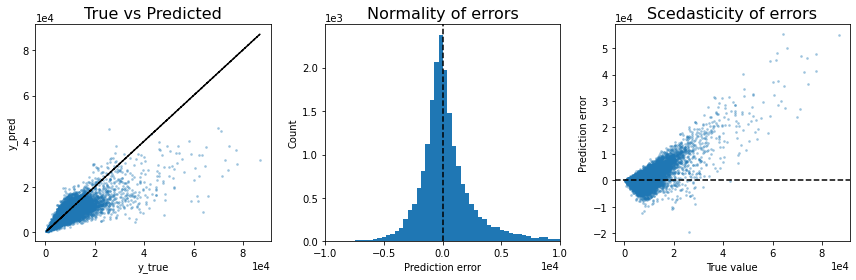

In [18]:
# # KNN

# # load model
# with open('models/various_knn.pkl', 'rb') as f:
#     knn = dill.load(f)

# # make predictions
# t0 = time.time()
# y_pred = knn.predict(X_test)
# t1 = time.time()

# # compute results
# test_results['KNeighborsRegressor'] = compute_result(y_test, y_pred, t1-t0)
# print(test_results,'\n')

# # Model evaluation
# models.evaluate(y_test, y_pred)
# models.plot_performance(y_test, y_pred)

In [19]:
# Stacking

### Final evaluation

In [17]:
# Show Model comparison

pd.DataFrame(test_results, index=['RMSE', 'MAPE', 'Prediction time / 1000 instances']).T.sort_values('RMSE')

,RMSE,MAPE,Prediction time / 1000 instances
Multilayer-perceptron,636.7,4.48%,0.0559s
Extreme gradient boosting,695.94,4.8%,0.0072s
Polynomial regression,859.23,5.56%,0.021s
Random forest,1045.04,6.83%,0.0154s
Greedy heuristic,1115.66,10.11%,734.1373s
Decision tree,1616.31,12.14%,0.001s
Multiple Regression (root-transform),1982.07,13.54%,0.0002s
Daganzo (1984) - CVRP,2055.55,16.93%,0.0001s
Multiple Linear Regression,2423.37,25.66%,0.0006s
Beardwood (1959) - TSP,4498.57,28.49%,0.0001s


### Feature extraction timing

In [20]:
# Feature extraction time
import generation
path = 'data/generated_final_pickle/00_10k_pickle/'
t0 = time.time()
df = generation.extract_features_dataset(path=path, filetype='pickle', num_instances=1000, verbose=1000)
print(f'Extraction completed in time elapsed: {time.time() - t0}')

1000 instances loaded (8.2s)
Extraction completed in time elapsed: 8.225918292999268


In [20]:
# Feature extraction time Daganzo

from scipy.spatial import ConvexHull

def extract_features_dataset(
    path,                 # (str) - path from where to load
    filetype='pickle',    # (str) - which filetype to load (pickle, json, or txt)
    num_instances='all',  # (str/int) - 'all': load all instances in path, int: how many instances to load
    verbose=10            # (int) - after how many instances report progress?
):  # -> Returns: pd.DataFrame
    """Loads a dataset of instances as pandas DataFrame."""
    t0 = time.time()
    filelist = os.listdir(path)
    if num_instances != 'all':
        filelist = filelist[:num_instances]
    rows = []
    loaded = 0
    # Loop through files
    for filename in filelist:
        if filename.endswith('.'+filetype):
            instance = routing.load_instance(path+filename)
            instance.compute_distance_matrix()
            features = extract_features_instance(instance)
            if hasattr(instance, 'solution_distance'):
                features['distance'] = instance.solution_distance # / features['NumCust']
            rows.append(features)
            loaded += 1
            # Print loading progress
            if verbose:
                if loaded % verbose == 0:
                    print(f'{loaded} instances loaded ({round(time.time()-t0, 2)}s)')
    return pd.DataFrame(rows)


def extract_features_instance(instance):
    """Extract features from an instance."""
    
    # Create features dictionary.
    features = {}
    
    # Store instance name
    if hasattr(instance, 'name'):
        features['name'] = instance.name
        
    # Extract features about locations and distances (ignore orientation)
    if instance.variant in ['tsp', 'cvrp', 'cvrptw']:
        
        # num_customers
        features['NumCust'] = float(instance.locations.shape[0] - 1)
        
        # area (smallest convex and compact hull)
        hull = ConvexHull(instance.locations)
        features['AreaRoot'] = np.sqrt(hull.volume)

        # depot-customer distances
        depot_cust  = instance.distance_matrix[0,1:]
        relative_depot_cust = depot_cust / features['AreaRoot']
        features['DepCustAvg'] = np.mean(relative_depot_cust)
        

    # Extract features about capacities and demands
    if instance.variant in ['cvrp', 'cvrptw']:
        
        # demand coverage
        features['CapRatio'] = instance.vehicle_capacities[0] / np.sum(instance.demands[1:])
        
    return features
        
path = 'data_final_unzipped/generated_final_pickle/00_10k_pickle/'
t0 = time.time()
df = extract_features_dataset(path=path, filetype='pickle', num_instances=1000, verbose=1000)
print(f'Extraction completed in time elapsed: {time.time() - t0}')

1000 instances loaded (2.85s)
Extraction completed in time elapsed: 2.8583106994628906


In [21]:
# Feature extraction time Beardwood

from scipy.spatial import ConvexHull

def extract_features_dataset(
    path,                 # (str) - path from where to load
    filetype='pickle',    # (str) - which filetype to load (pickle, json, or txt)
    num_instances='all',  # (str/int) - 'all': load all instances in path, int: how many instances to load
    verbose=10            # (int) - after how many instances report progress?
):  # -> Returns: pd.DataFrame
    """Loads a dataset of instances as pandas DataFrame."""
    t0 = time.time()
    filelist = os.listdir(path)
    if num_instances != 'all':
        filelist = filelist[:num_instances]
    rows = []
    loaded = 0
    # Loop through files
    for filename in filelist:
        if filename.endswith('.'+filetype):
            instance = routing.load_instance(path+filename)
            instance.compute_distance_matrix()
            features = extract_features_instance(instance)
            if hasattr(instance, 'solution_distance'):
                features['distance'] = instance.solution_distance # / features['NumCust']
            rows.append(features)
            loaded += 1
            # Print loading progress
            if verbose:
                if loaded % verbose == 0:
                    print(f'{loaded} instances loaded ({round(time.time()-t0, 2)}s)')
    return pd.DataFrame(rows)


def extract_features_instance(instance):
    """Extract features from an instance."""
    
    # Create features dictionary.
    features = {}
    
    # Store instance name
    if hasattr(instance, 'name'):
        features['name'] = instance.name
        
    # Extract features about locations and distances (ignore orientation)
    if instance.variant in ['tsp', 'cvrp', 'cvrptw']:
        
        # num_customers
        features['NumCust'] = float(instance.locations.shape[0] - 1)
        
        # area (smallest convex and compact hull)
        hull = ConvexHull(instance.locations)
        features['AreaRoot'] = np.sqrt(hull.volume)

    return features
        
path = 'data_final_unzipped/generated_final_pickle/00_10k_pickle/'
t0 = time.time()
df = extract_features_dataset(path=path, filetype='pickle', num_instances=1000, verbose=1000)
print(f'Extraction completed in time elapsed: {time.time() - t0}')

1000 instances loaded (2.8s)
Extraction completed in time elapsed: 2.805032253265381
